<a href="https://colab.research.google.com/github/focccus/MVE550-Stochastic-processes/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(ggplot2)

## 1: Baysian Inference

In [ ]:
data <- c(12, 21, 12, 13, 11,19)  # Example data


# Compute parameters for posterior
alpha <- sum(data)         # Shape parameter
beta <- length(data)       # Rate parameter

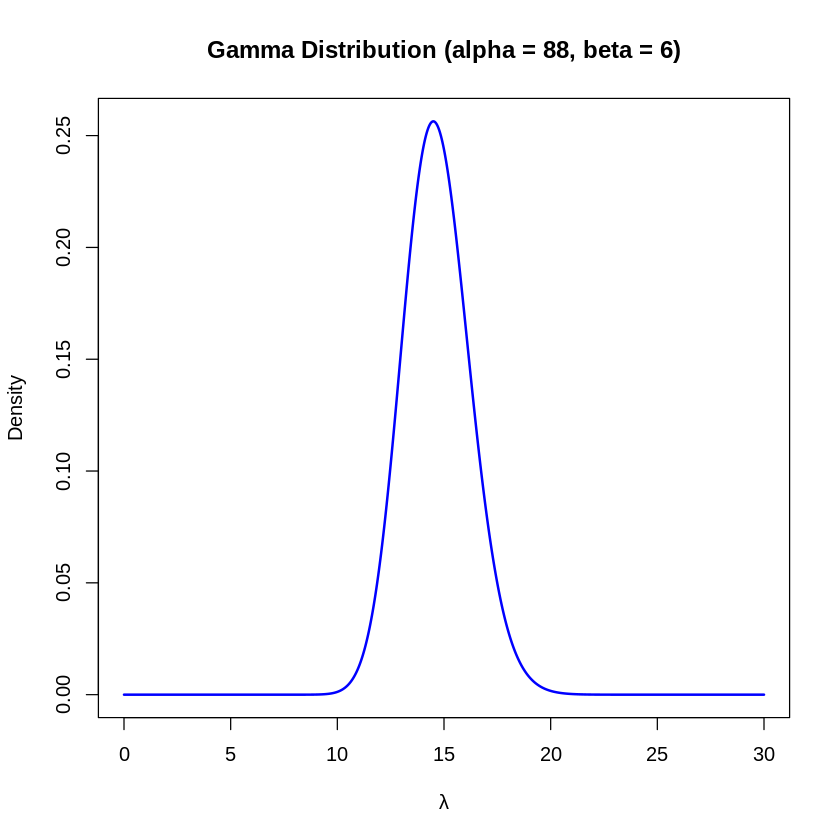

In [ ]:
# Set the parameters for the Gamma distribution

# Define a sequence of values for lambda (x-axis values)
lambda <- seq(0, 30, length.out = 1000)

# Calculate the density of the Gamma distribution
gamma_density <- dgamma(lambda, shape = alpha, rate = beta)

# Plot the Gamma distribution
plot(lambda, gamma_density, type = "l",
     main = "Gamma Distribution (alpha = 88, beta = 6)",
     xlab = expression(lambda),
     ylab = "Density",
     col = "blue", lwd = 2)


[1] 0.06320352


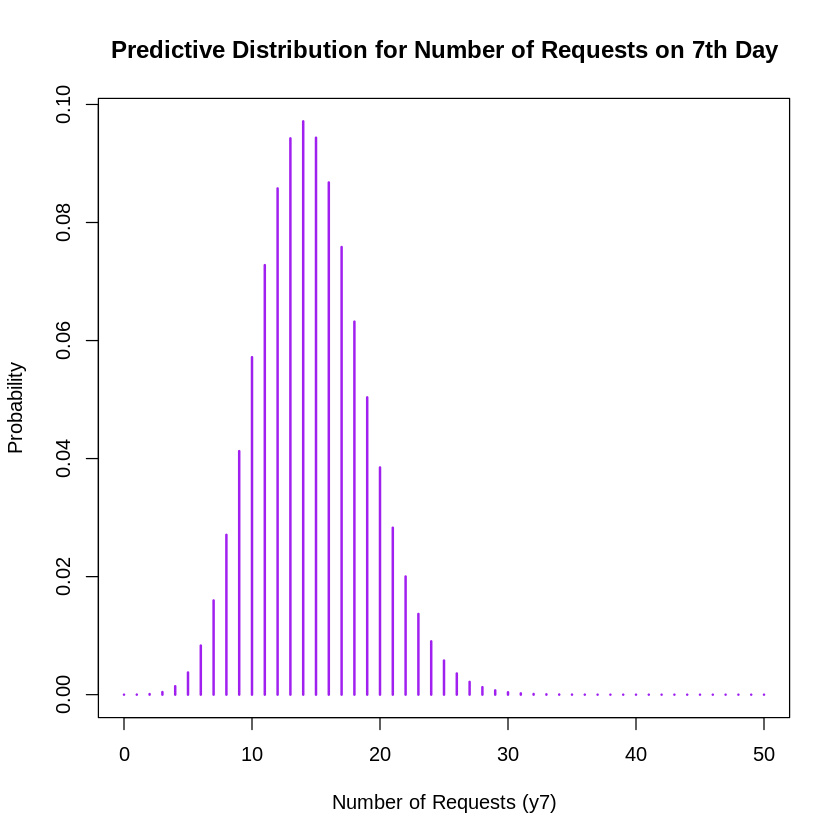

In [ ]:
# Set parameters for the Negative Binomial distribution
alpha <- 88
beta <- 6
p <- beta / (1 + beta)  # probability of success for Negative Binomial

# Generate values for y7 (number of requests)
y7_values <- 0:50  # range of possible values for requests on the 7th day

# Calculate the probability mass function for the Negative Binomial distribution
predictive_distribution <- dnbinom(y7_values, size = alpha, prob = p)

print(predictive_distribution[18+1])

# Plot the predictive distribution
plot(y7_values, predictive_distribution, type = "h",
     main = "Predictive Distribution for Number of Requests on 7th Day",
     xlab = "Number of Requests (y7)",
     ylab = "Probability",
     col = "purple", lwd = 2)


In [ ]:

# Number of discretization points
n_points <- 100  # You can adjust this for higher accuracy

# Discretize the range of lambda
lambda_values <- seq(1, 30, length.out = n_points)  # Choose an appropriate range for lambda

In [ ]:
delta_lambda <- lambda_values[2]-lambda_values[1] # Calculate the step size
#prior_density <- dgamma(lambda_values, shape = 0, rate = 0)
prior_density <- 1/lambda_values
cat(prior_density)

1 0.7734375 0.6305732 0.5322581 0.4604651 0.4057377 0.3626374 0.3278146 0.2990937 0.275 0.2544987 0.2368421 0.2214765 0.2079832 0.1960396 0.1853933 0.1758437 0.1672297 0.1594203 0.1523077 0.1458027 0.1398305 0.1343284 0.1292428 0.1245283 0.1201456 0.116061 0.1122449 0.1086718 0.1053191 0.1021672 0.0991984 0.09639727 0.09375 0.09124424 0.08886894 0.08661417 0.08447099 0.08243131 0.0804878 0.07863384 0.07686335 0.07517084 0.07355126 0.072 0.07051282 0.06908583 0.06771546 0.06639839 0.06513158 0.0639122 0.06273764 0.06160548 0.06051345 0.05945946 0.05844156 0.05745792 0.05650685 0.05558675 0.05469613 0.05383361 0.05299786 0.05218766 0.05140187 0.05063939 0.04989919 0.04918033 0.04848188 0.04780299 0.04714286 0.0465007 0.04587581 0.04526749 0.04467509 0.044098 0.04353562 0.04298741 0.04245283 0.04193139 0.04142259 0.040926 0.04044118 0.0399677 0.03950519 0.03905325 0.03861154 0.03817971 0.03775744 0.0373444 0.0369403 0.03654485 0.03615778 0.03577882 0.03540773 0.03504425 0.03468816 0.03433

In [ ]:
cat(lambda_values)

1 1.292929 1.585859 1.878788 2.171717 2.464646 2.757576 3.050505 3.343434 3.636364 3.929293 4.222222 4.515152 4.808081 5.10101 5.393939 5.686869 5.979798 6.272727 6.565657 6.858586 7.151515 7.444444 7.737374 8.030303 8.323232 8.616162 8.909091 9.20202 9.494949 9.787879 10.08081 10.37374 10.66667 10.9596 11.25253 11.54545 11.83838 12.13131 12.42424 12.71717 13.0101 13.30303 13.59596 13.88889 14.18182 14.47475 14.76768 15.06061 15.35354 15.64646 15.93939 16.23232 16.52525 16.81818 17.11111 17.40404 17.69697 17.9899 18.28283 18.57576 18.86869 19.16162 19.45455 19.74747 20.0404 20.33333 20.62626 20.91919 21.21212 21.50505 21.79798 22.09091 22.38384 22.67677 22.9697 23.26263 23.55556 23.84848 24.14141 24.43434 24.72727 25.0202 25.31313 25.60606 25.89899 26.19192 26.48485 26.77778 27.07071 27.36364 27.65657 27.94949 28.24242 28.53535 28.82828 29.12121 29.41414 29.70707 30

In [ ]:
likelihood_density <- sapply(lambda_values, function(l) prod(dpois(data, lambda = l)))
print(likelihood_density)

  [1] 6.993340e-75 7.942539e-66 8.736671e-59 4.529082e-53 2.692466e-48
  [6] 3.181009e-44 1.074652e-40 1.337397e-37 7.365586e-35 2.059010e-32
 [11] 3.245622e-30 3.132855e-28 1.977808e-26 8.614468e-25 2.704908e-23
 [16] 6.350915e-22 1.149844e-20 1.647802e-19 1.911394e-18 1.829613e-17
 [21] 1.469666e-16 1.005309e-15 5.932073e-15 3.054174e-14 1.386002e-13
 [26] 5.594301e-13 2.024699e-12 6.618747e-12 1.967216e-11 5.347865e-11
 [31] 1.336953e-10 3.088916e-10 6.625399e-10 1.324745e-09 2.478672e-09
 [36] 4.355053e-09 7.208742e-09 1.127497e-08 1.670956e-08 2.352473e-08
 [41] 3.153796e-08 4.035152e-08 4.937495e-08 5.789196e-08 6.516059e-08
 [46] 7.052573e-08 7.351931e-08 7.392647e-08 7.180561e-08 6.746151e-08
 [51] 6.138180e-08 5.415334e-08 4.637683e-08 3.859480e-08 3.124251e-08
 [56] 2.462449e-08 1.891414e-08 1.417025e-08 1.036325e-08 7.404238e-09
 [61] 5.171928e-09 3.534432e-09 2.364692e-09 1.549876e-09 9.957574e-10
 [66] 6.274799e-10 3.880429e-10 2.356281e-10 1.405612e-10 8.241555e-11
 [71] 

In [ ]:
length(likelihood_density)

[1] 100

In [ ]:
posterior_density <- likelihood_density * prior_density
posterior_density<-posterior_density/sum(posterior_density)
# Print the result
cat("discritized posterior is :", posterior_density, "\n")

discritized posterior is : 1.033916e-67 9.08208e-59 8.144835e-52 3.563963e-46 1.832937e-41 1.908144e-37 5.761572e-34 6.481705e-31 3.256981e-28 8.371281e-26 1.221193e-23 1.096983e-21 6.476084e-20 2.64885e-18 7.839655e-17 1.740728e-15 2.989279e-14 4.073983e-13 4.504997e-12 4.119854e-11 3.167997e-10 2.078272e-09 1.17808e-08 5.835807e-08 2.551718e-07 9.936982e-07 3.47414e-06 1.098356e-05 3.1606e-05 8.327e-05 0.0002019428 0.0004530138 0.0009442294 0.001836134 0.003343684 0.005721951 0.009231008 0.01408069 0.02036375 0.02799339 0.03666433 0.04585428 0.05487276 0.06295194 0.06936146 0.07352185 0.07509156 0.07400968 0.07048824 0.06496035 0.05799948 0.05022896 0.04223973 0.0345288 0.02746424 0.02127599 0.01606709 0.01183803 0.008516637 0.005987392 0.004116297 0.002769355 0.001824497 0.001177813 0.0007454915 0.0004629073 0.0002821447 0.0001688913 9.933933e-05 5.74415e-05 3.266813e-05 1.828149e-05 1.007105e-05 5.463792e-06 2.920397e-06 1.538454e-06 7.99064e-07 4.093427e-07 2.068945e-07 1.032072e-

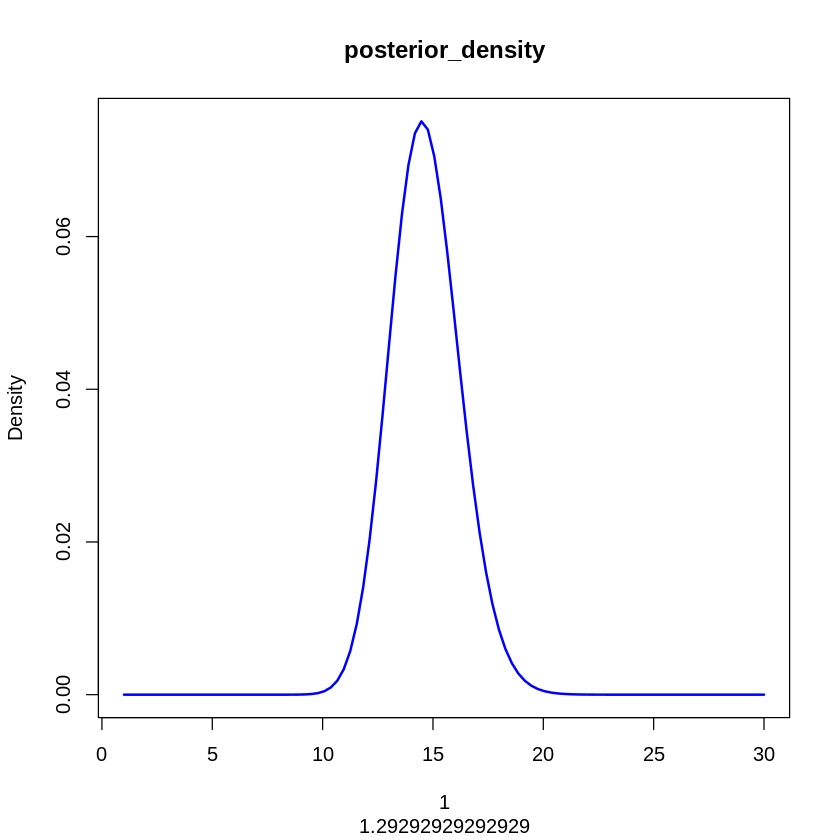

In [ ]:
# Plot the Gamma distribution
plot(lambda_values, posterior_density, type = "l",
     main = "posterior_density",
     xlab = lambda_values,
     ylab = "Density",
     col = "blue", lwd = 2)

In [ ]:
#posterior_density <- dgamma(lambda_values, shape = alpha, rate = beta)

y7 <- 18
predictive_probabilities <- dpois(y7, lambda = lambda_values)

# Compute the weighted sum to approximate the predictive probability
predictive_distribution <- sum(predictive_probabilities * posterior_density)

# Print the result
cat("Approximate probability of exactly 18 requests on the 7th day:", predictive_distribution, "\n")


Approximate probability of exactly 18 requests on the 7th day: 0.06320352 


## 2: Markov Chain
![graph](https://github.com/focccus/MVE550-Stochastic-processes/blob/main/A1/graph.png?raw=1)


In [ ]:


Q <- matrix(c(0, 1, 1, 1, 1,
              0, 1, 1, 1, 1,
              0, 1, 0, 1, 1, # + 1/4 probability to 6
              0, 2, 0, 0, 1, # + 1/4 probability to 6
              0, 2, 1, 0, 0 # + 1/4 probability to 6
              ), 5, 5, byrow=T)/4

R <- c(0, 0, 1, 1, 1)/4
F <- solve(diag(5)-Q)
print(F)

     [,1]     [,2]      [,3]      [,4]     [,5]
[1,]    1 2.575758 1.2727273 1.2121212 1.515152
[2,]    0 3.575758 1.2727273 1.2121212 1.515152
[3,]    0 2.060606 1.8181818 0.9696970 1.212121
[4,]    0 2.363636 0.9090909 1.8181818 1.272727
[5,]    0 2.303030 1.0909091 0.8484848 2.060606


In [ ]:
# Probability of absorbtion (should be 1)
print(F%*%R)

     [,1]
[1,]    1
[2,]    1
[3,]    1
[4,]    1
[5,]    1


In [ ]:
# Probability of visiting state 3 at least once:
print(F%*%c(1,1,1,0,0)/4)
print(Q[,4])

In [ ]:
# Expected number of steps to absorbtion is given by first element of F1
print(F%*%rep(1, 5))

         [,1]
[1,] 7.575758
[2,] 7.575758
[3,] 6.060606
[4,] 6.363636
[5,] 6.303030


In [ ]:
# Probability of revisiting state 3